### Introduction

For our group project we will be predicting the quality of different wine samples given different character traits of the wine. When wine is being processed for production and storage, it undergoes an oxidation reaction and loses some of its fruit aromas. However, this can be prevented buy adding preservatives such as sulpher dioxide. This acts as an antiseptic which prevents the prominent flavours from being lost over time and helps preserve the quality of the drink. In our study we will be asking if the quality of different wines, such as red vs white, can be predicted based on differnent factors. The factors we will be investigating include pH level, alcohol (vol%), residual sugar (g/dm^3), chlorides (g(sodium chloride)/dm3), density (g/cm^3), and citric acid (g/dm3). The quality will be determined using a 10 point scale. Current research on this topic that insipred this study comes from the article "Modeling wine preferences by data mining from physicochemical properties". The following study can be found here: https://www.sciencedirect.com/science/article/pii/S0167923609001377?via=ihub The dataset we will be using is https://www.kaggle.com/yasserh/wine-quality-dataset. The dataset has been made tidy for better comprehension and is included below.

### Method

We will be conducting our data analysis by tidying a dataset, and creating visualizations to predict the quality of wine using factors such as the total.sulfur.dioxide, pH, alcohol, residual.sugar, chlorides, density, and citric.acid. While some variables have a linear relationship with quality, some not so much. But, they can be used to predict the quality after we train our model with the training data. Some future questions this could lead to include the questioning which features that together create a prefered taste and how preservatives influcence the quality of of wine with time. However, there are variables such as Chlorides and residual sugar which dont have much difference in the mean, hence would eventially have to be swapped with other variables. The plots related to all variables vs quality show how each of them differes as the quality of the wine increases. Some decrease, some increase, but through these differences we should be able to see some amazing predictions (and some even surprising ones) regarding the quality of a wine. We first planned on doing a scatter plot and a box plot, but since quality is distinct, we did a crossover and decided to overlay scatter plot over each individual box plot for each quality. This is because we could recognize the distribution between quality and the variables in y axis. We then scaled all the data and centered it so the uneveness in the data is minimized and we could properly analyze the centralized data. However, even after being scaled there doesnt seem to be much difference btween actual plot and scaled plot. 

### Expected Outcome
The expected outcome of our study is that we will be able to predict the quality of wine based on the given pH, the amount of slupher dioxide, and the amount of alcohol in the wine. The impact of the findings in a real world context would include improving wine production and the ability to target techniques that produce a more favourable taste of wine. The impact of our direct project findings is to create a fast and accessible way to undertsand the quality of a certain wine in comparison to others by viewing it on a given plot.

### Preliminary exploratory data analysis

In [2]:
# Loading package
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [3]:
# Import dataset

url <- "https://raw.githubusercontent.com/SurajDatta/DSCI100_group_project/main/data/WineQT.csv"
wine_data <- read_csv(url)

colnames(wine_data) <- make.names(colnames(wine_data))

wine_data_clean <- wine_data %>%
select(total.sulfur.dioxide, pH, alcohol, quality, residual.sugar, chlorides, density, citric.acid)

head(wine_data_clean)



Parsed with column specification:
cols(
  `fixed acidity` = col_double(),
  `volatile acidity` = col_double(),
  `citric acid` = col_double(),
  `residual sugar` = col_double(),
  chlorides = col_double(),
  `free sulfur dioxide` = col_double(),
  `total sulfur dioxide` = col_double(),
  density = col_double(),
  pH = col_double(),
  sulphates = col_double(),
  alcohol = col_double(),
  quality = col_double(),
  Id = col_double()
)



total.sulfur.dioxide,pH,alcohol,quality,residual.sugar,chlorides,density,citric.acid
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
34,3.51,9.4,5,1.9,0.076,0.9978,0.00
67,3.20,9.8,5,2.6,0.098,0.9968,0.00
54,3.26,9.8,5,2.3,0.092,0.9970,0.04
60,3.16,9.8,6,1.9,0.075,0.9980,0.56
34,3.51,9.4,5,1.9,0.076,0.9978,0.00
40,3.51,9.4,5,1.8,0.075,0.9978,0.00


In [4]:
# train the data

wine_split <- initial_split(wine_data_clean, prop = 0.75, strata = quality)
wine_train <- training(wine_split)
wine_test <- testing(wine_split)

#find mean of each predictors

In [5]:
# Means of seven variables from wine_train for prediction

so2_aggregate <- wine_train %>%
    group_by(quality) %>%
    summarize(average_so2 = mean(total.sulfur.dioxide, na.rm = TRUE))

pH_aggregate <- wine_train %>%
    group_by(quality) %>%
    summarize(average_pH = mean(pH, na.rm = TRUE))

alcohol_aggregate <- wine_train %>%
    group_by(quality) %>%
    summarize(average_alcohol = mean(alcohol, na.rm = TRUE))

residual.sugar_aggregate <- wine_train %>%
    group_by(quality) %>%
    summarize(average_residual.sugar = mean(residual.sugar, na.rm = TRUE))

chlorides_aggregate <- wine_train %>%
    group_by(quality) %>%
    summarize(average_chlorides = mean(chlorides, na.rm = TRUE))

density_aggregate <- wine_train %>%
    group_by(quality) %>%
    summarize(average_density = mean(density, na.rm = TRUE))
citric.acid_aggregate <- wine_train %>%
    group_by(quality) %>%
    summarize(average_citric.acid = mean(citric.acid, na.rm = TRUE))

so2_aggregate
pH_aggregate
alcohol_aggregate
residual.sugar_aggregate
chlorides_aggregate
density_aggregate
citric.acid_aggregate

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



quality,average_so2
<dbl>,<dbl>
3,27.60000
4,40.40000
5,52.79972
6,39.85591
7,37.74766
8,25.92308


quality,average_pH
<dbl>,<dbl>
3,3.334000
4,3.364400
5,3.296354
6,3.317666
7,3.295701
8,3.223846


quality,average_alcohol
<dbl>,<dbl>
3,9.450000
4,10.156000
5,9.899171
6,10.626417
7,11.516978
8,11.984615


quality,average_residual.sugar
<dbl>,<dbl>
3,2.780000
4,2.604000
5,2.481768
6,2.439193
7,2.749065
8,2.792308


quality,average_chlorides
<dbl>,<dbl>
3,0.09900000
4,0.09964000
5,0.09016851
6,0.08679539
7,0.07246729
8,0.07323077


quality,average_density
<dbl>,<dbl>
3,0.9982660
4,0.9967856
5,0.9970884
6,0.9966488
7,0.9960771
8,0.9957331


quality,average_citric.acid
<dbl>,<dbl>
3,0.2540000
4,0.1820000
5,0.2420442
6,0.2635159
7,0.3893458
8,0.4638462


There is no data with NA values or other symbols

Warning message:
“Continuous x aesthetic -- did you forget aes(group=...)?”
Warning message:
“Continuous x aesthetic -- did you forget aes(group=...)?”
Warning message:
“Continuous x aesthetic -- did you forget aes(group=...)?”
Warning message:
“Continuous x aesthetic -- did you forget aes(group=...)?”
Warning message:
“Continuous x aesthetic -- did you forget aes(group=...)?”
Warning message:
“Continuous x aesthetic -- did you forget aes(group=...)?”
Warning message:
“Continuous x aesthetic -- did you forget aes(group=...)?”


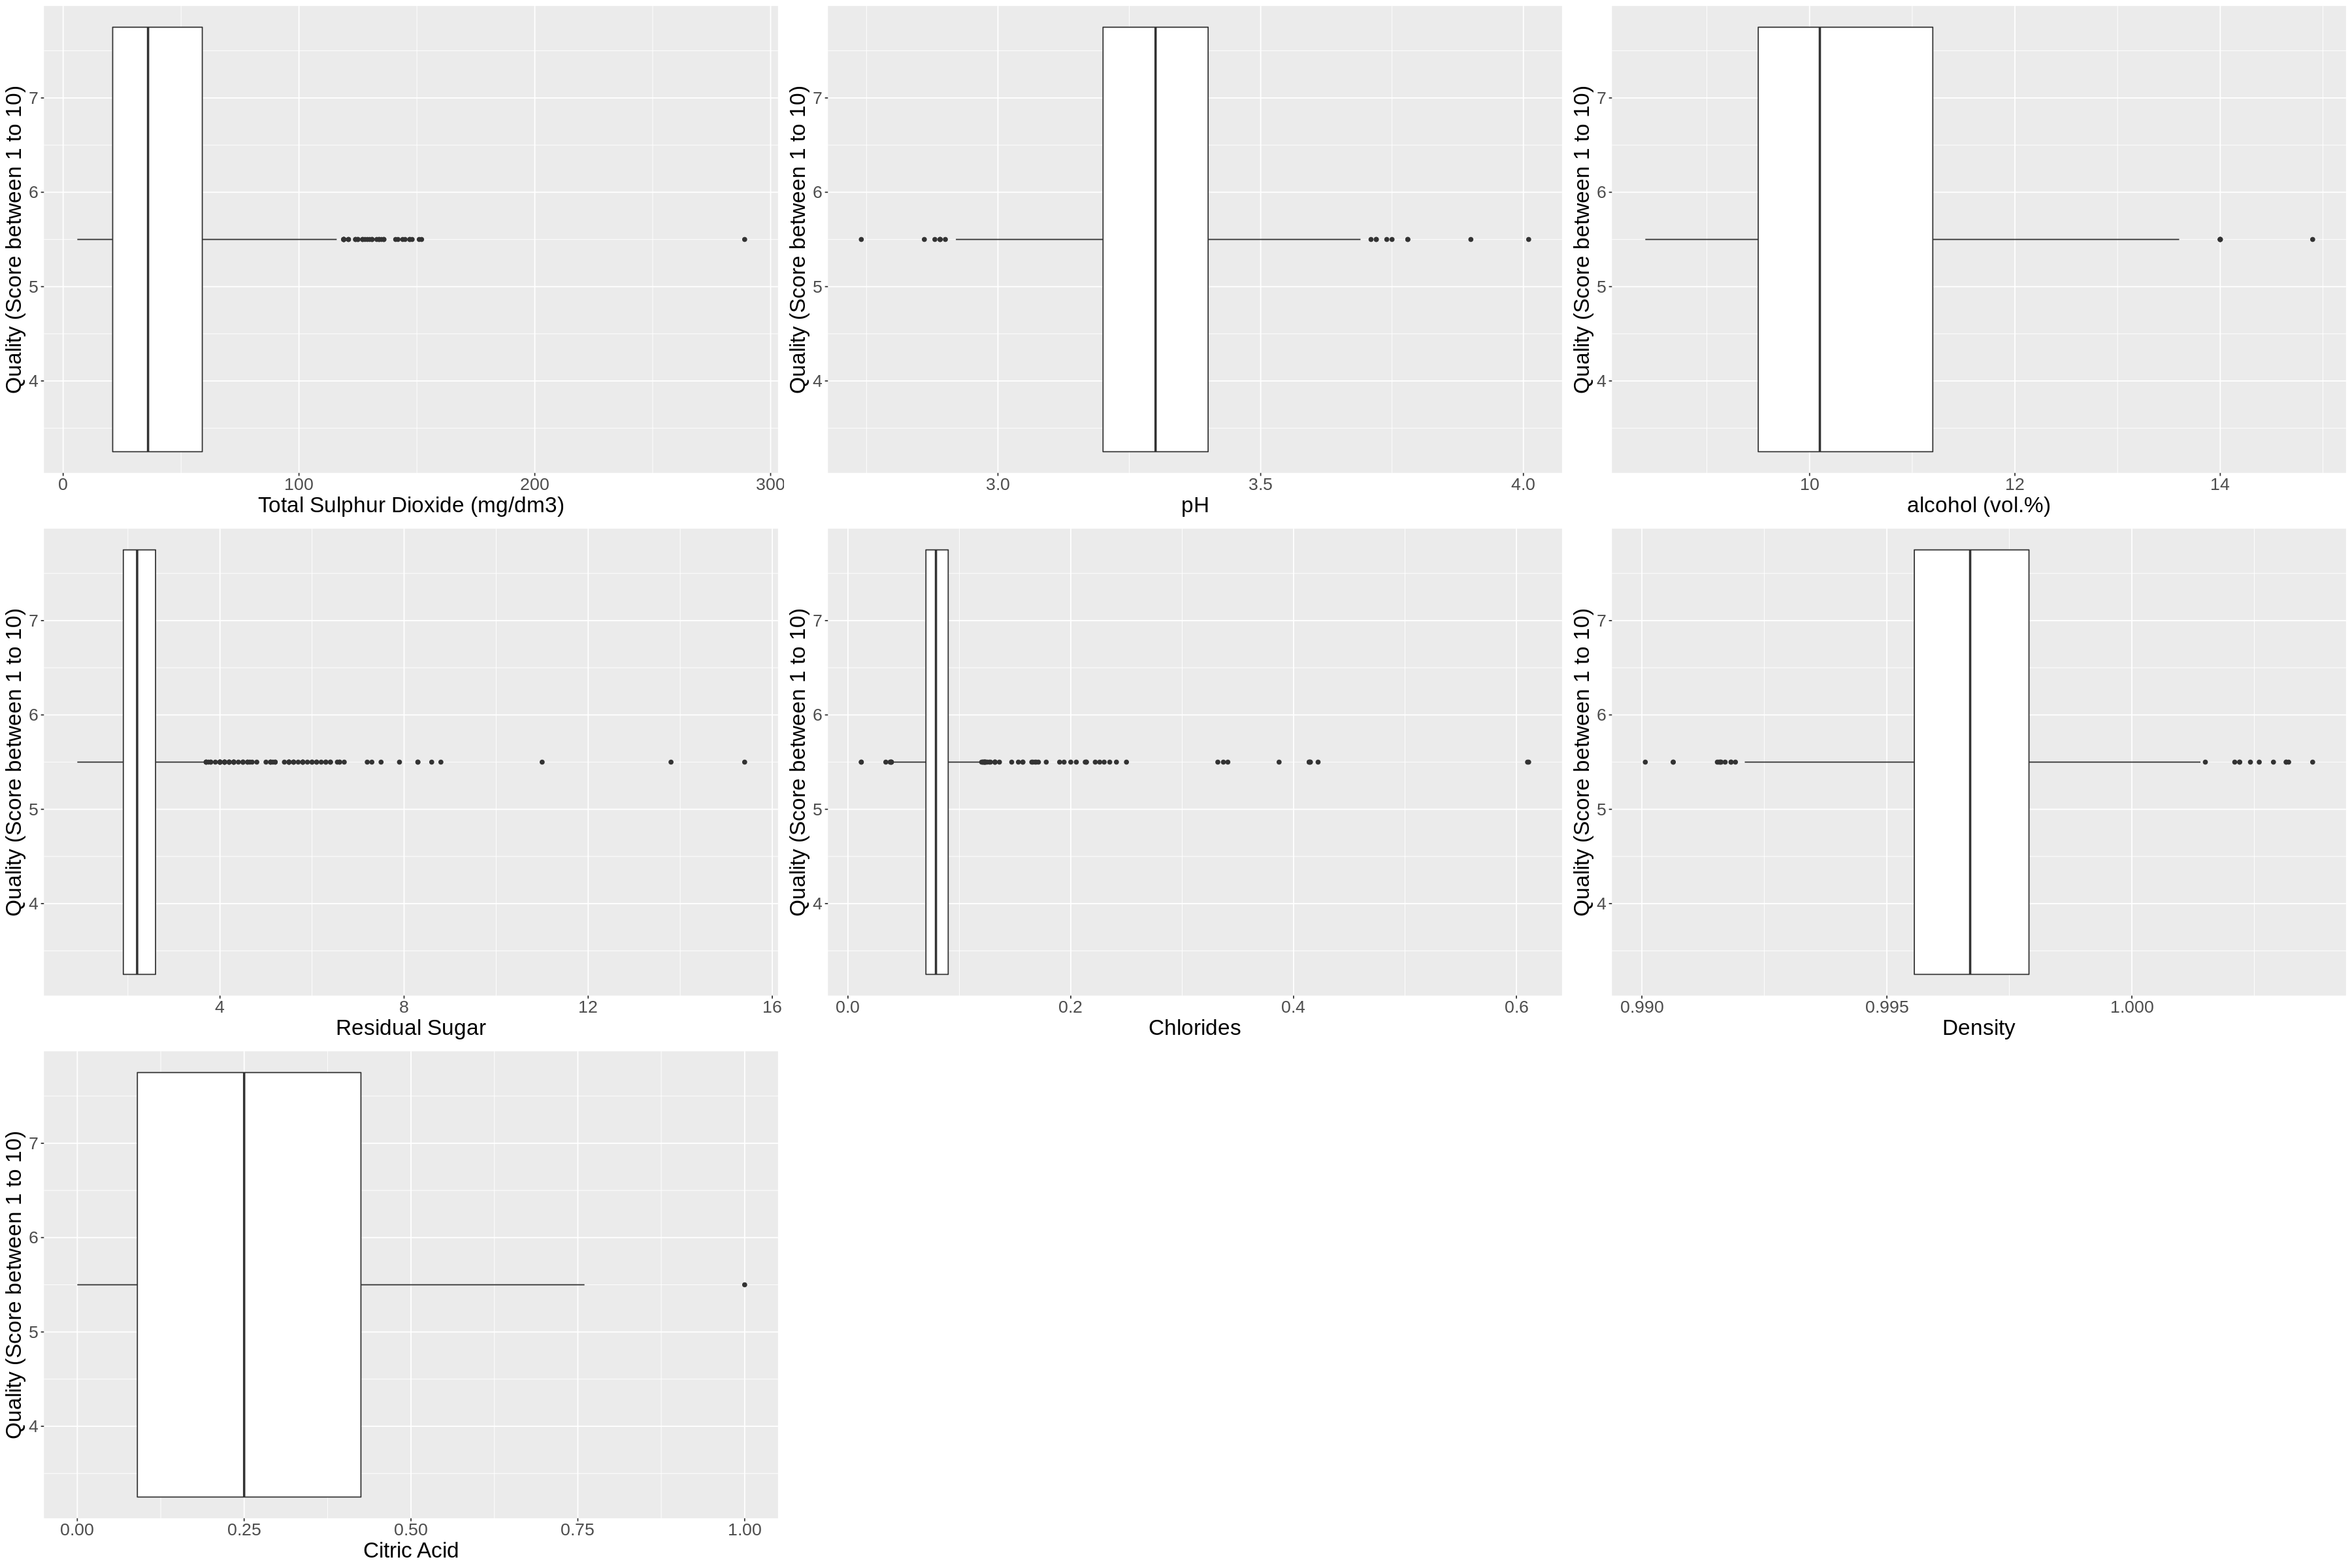

In [6]:
# Generate plots

options(repr.plot.width = 30, repr.plot.height = 20)

wine_boxplot_so2 <- wine_train %>%
    ggplot(aes(x = quality,
               y = total.sulfur.dioxide)) +
    geom_boxplot()+
    coord_flip()+
    xlab('Quality (Score between 1 to 10)') +
    ylab ('Total Sulphur Dioxide (mg/dm3)') +
    theme(text = element_text(size = 20))


wine_boxplot_pH <- wine_train %>%
    ggplot(aes(x = quality,
               y = pH)) +
    geom_boxplot() +
    coord_flip()+
    xlab('Quality (Score between 1 to 10)') + 
    ylab ('pH') +
    theme(text = element_text(size = 20))


wine_boxplot_alcohol <- wine_train %>%
    ggplot(aes(x = quality,
               y = alcohol)) +
    geom_boxplot()+
coord_flip()+
    xlab('Quality (Score between 1 to 10)') +
    ylab ('alcohol (vol.%)') +
    theme(text = element_text(size = 20))


wine_boxplot_residual.sugar <- wine_train %>%
    ggplot(aes(x = quality,
               y = residual.sugar)) +
    geom_boxplot()+
    coord_flip()+
    xlab('Quality (Score between 1 to 10)') +
    ylab ('Residual Sugar') +
    theme(text = element_text(size = 20))


wine_boxplot_chlorides <- wine_train %>%
    ggplot(aes(x = quality,
               y = chlorides)) +
    geom_boxplot()+
    coord_flip()+
    xlab('Quality (Score between 1 to 10)') +
    ylab ('Chlorides') +
    theme(text = element_text(size = 20))


wine_boxplot_density <- wine_train %>%
    ggplot(aes(x = quality,
               y = density)) +
    geom_boxplot()+
    coord_flip()+
    xlab('Quality (Score between 1 to 10)') +
    ylab ('Density') +
    theme(text = element_text(size = 20))

wine_boxplot_citric.acid <- wine_train %>%
    ggplot(aes(x = quality,
               y = citric.acid)) +
    geom_boxplot()+
    coord_flip()+
    xlab('Quality (Score between 1 to 10)') +
    ylab ('Citric Acid') +
    theme(text = element_text(size = 20))

plot_grid(wine_boxplot_so2, wine_boxplot_pH, wine_boxplot_alcohol, wine_boxplot_residual.sugar, wine_boxplot_chlorides, wine_boxplot_density, wine_boxplot_citric.acid)

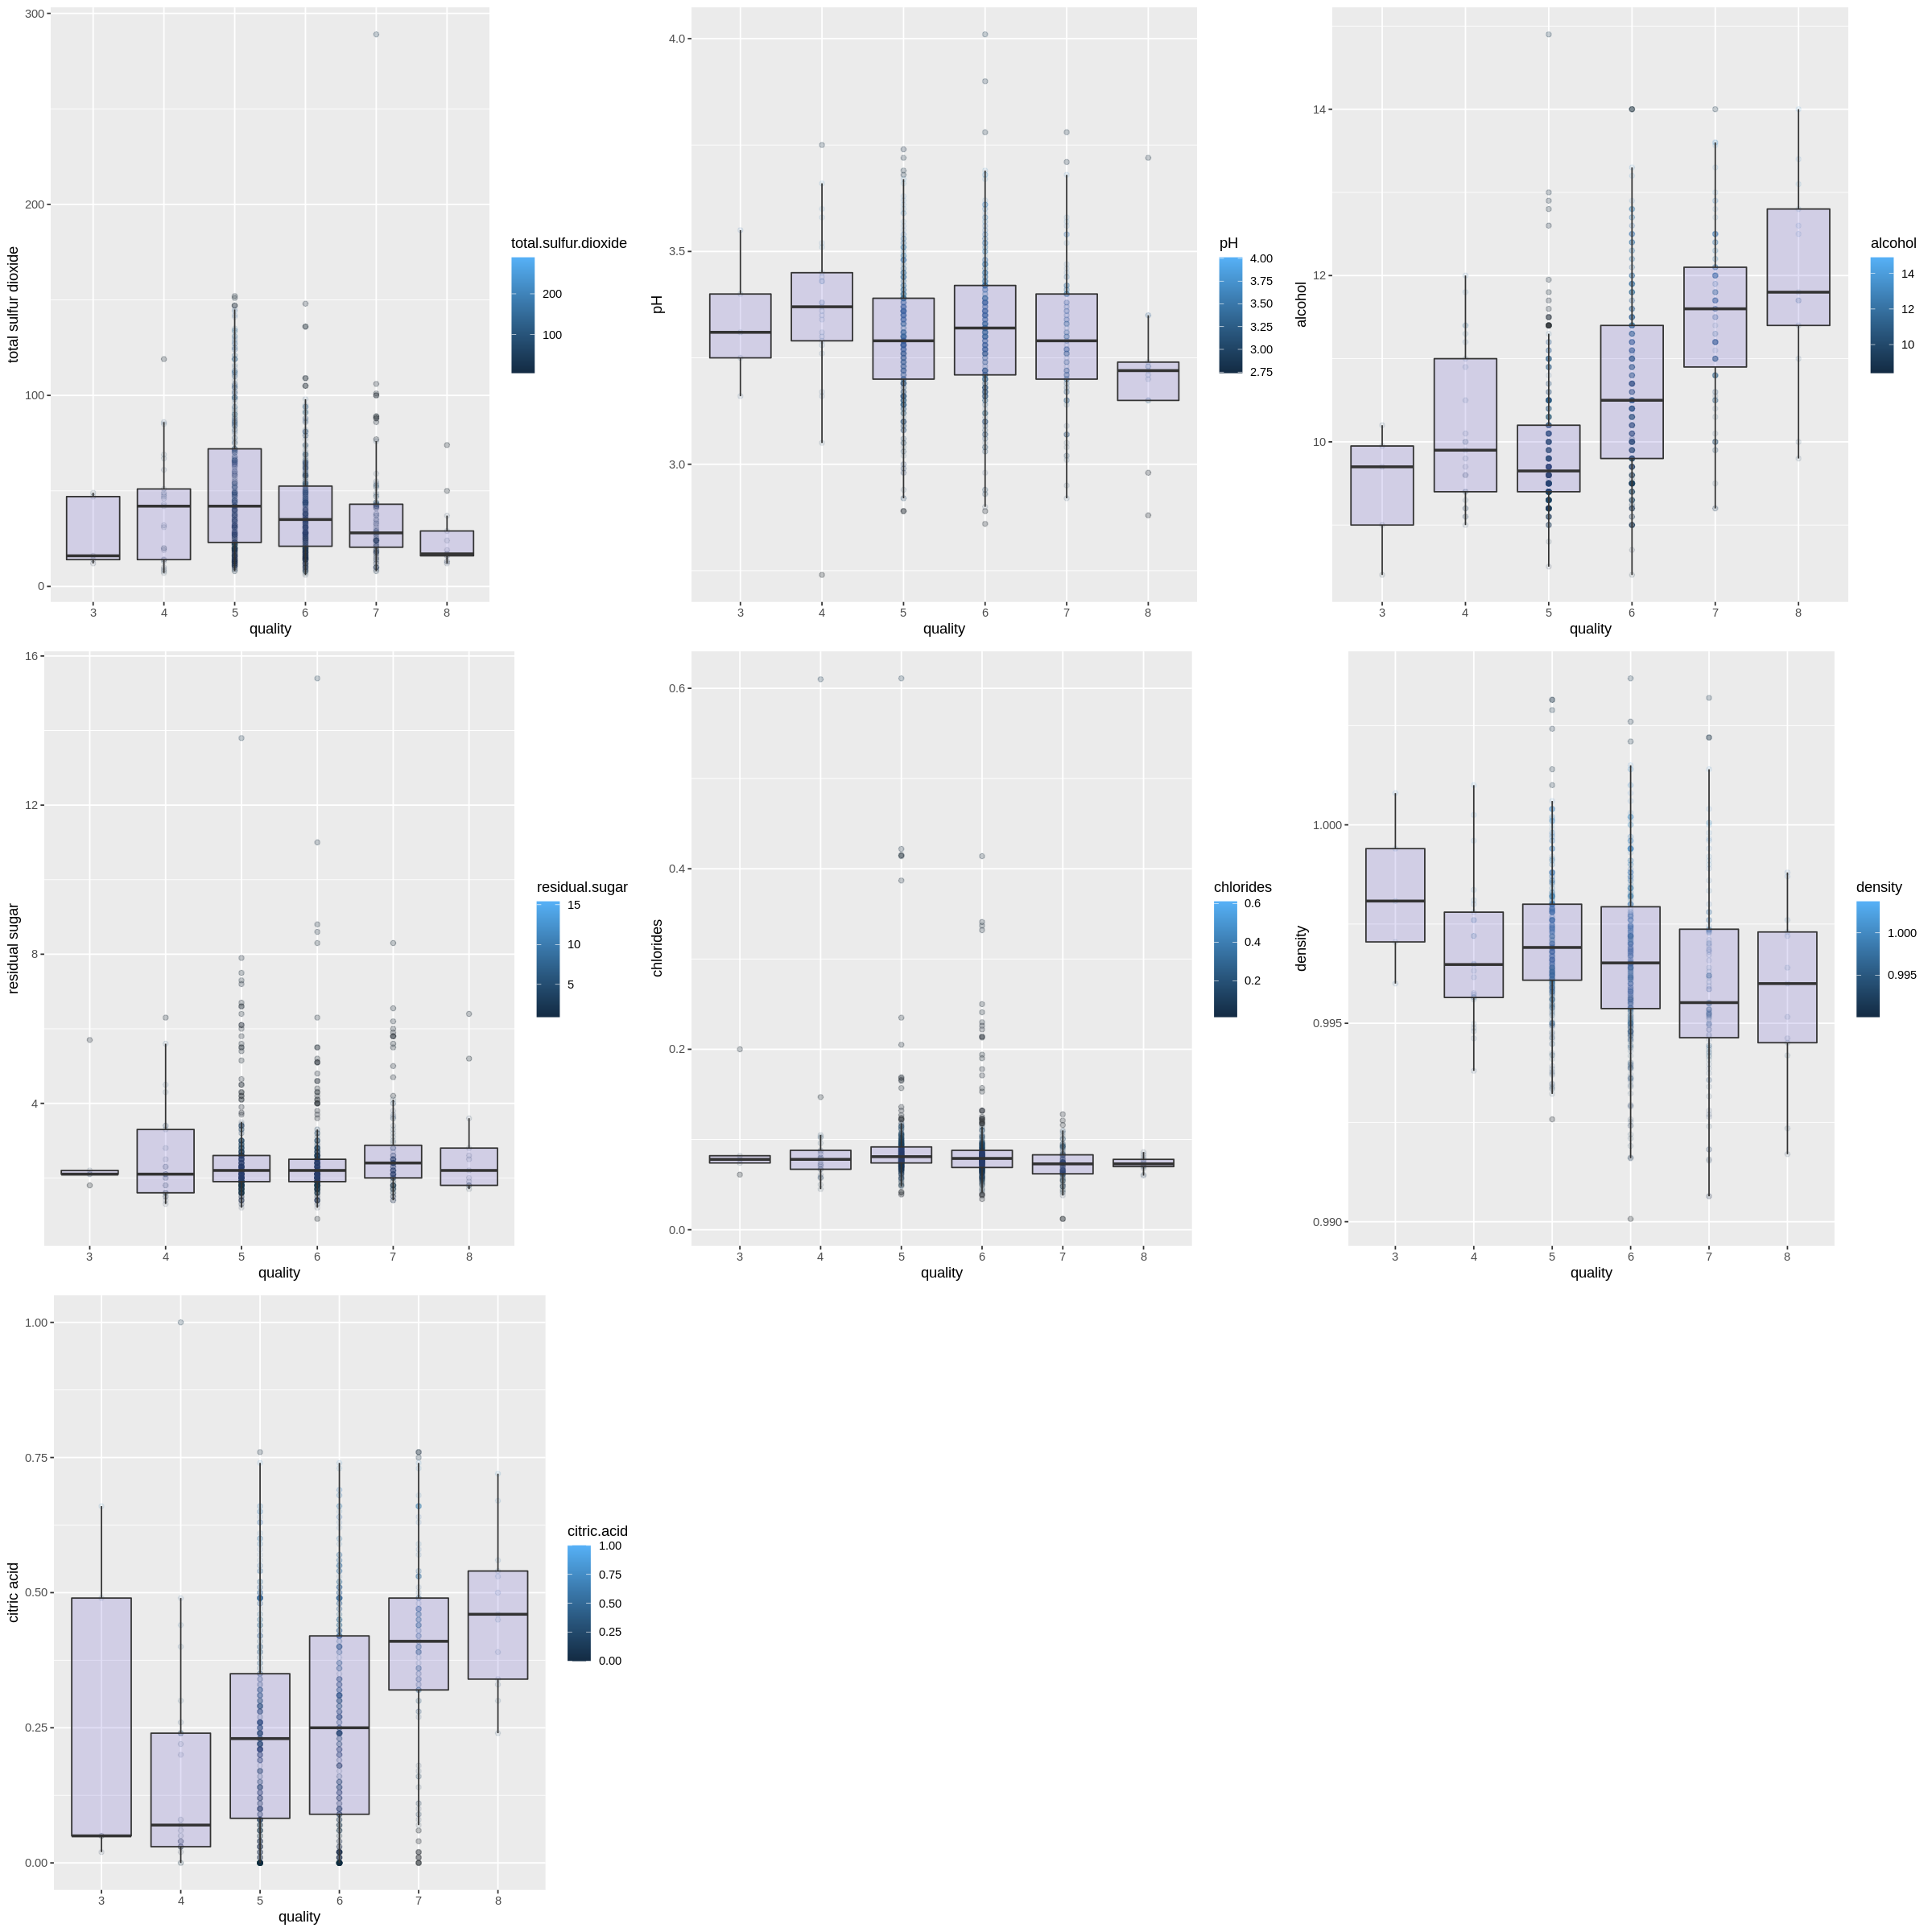

In [7]:
options(repr.plot.width = 20, repr.plot.height = 20)

relation_tsd <- wine_train %>%
   ggplot(aes(x = total.sulfur.dioxide, y = as.factor(quality))) +
   geom_point(aes(colour = total.sulfur.dioxide), alpha = 0.1) +
   geom_boxplot(fill="slateblue", alpha= 0.2) +
   coord_flip() +
   xlab("total sulfur dioxide") +
   ylab("quality")

relation_ph <- wine_train %>%
   ggplot(aes(x = pH, y = as.factor(quality))) +
   geom_point(aes(colour = pH), alpha = 0.1) +
   geom_boxplot(fill="slateblue", alpha= 0.2) +
   coord_flip() +
   xlab("pH") +
   ylab("quality")

relation_ah <- wine_train %>%
   ggplot(aes(x = alcohol, y = as.factor(quality))) +
   geom_point(aes(colour = alcohol), alpha = 0.1) +
   geom_boxplot(fill="slateblue", alpha= 0.2) +
   coord_flip() +
   xlab("alcohol") +
   ylab("quality")

relation_rs <- wine_train %>%
   ggplot(aes(x = residual.sugar, y = as.factor(quality))) +
   geom_point(aes(color = residual.sugar), alpha = 0.1) +
   geom_boxplot(fill="slateblue", alpha= 0.2) +
   coord_flip() +
   xlab("residual sugar") +
   ylab("quality")

relation_ch <- wine_train %>%
   ggplot(aes(x = chlorides, y = as.factor(quality))) +
   geom_point(aes(color = chlorides), alpha = 0.1) +
   geom_boxplot(fill="slateblue", alpha= 0.2) +
   coord_flip() +
   xlab("chlorides") +
   ylab("quality")

relation_ds <- wine_train %>%
   ggplot(aes(x = density, y = as.factor(quality))) +
   geom_point(aes(color = density), alpha = 0.1) +
   geom_boxplot(fill="slateblue", alpha= 0.2) +
   coord_flip() +
   xlab("density") +
   ylab("quality")

relation_ca <- wine_train %>%
   ggplot(aes(x = citric.acid, y = as.factor(quality))) +
   geom_point(aes(color = citric.acid), alpha = 0.1) +
   geom_boxplot(fill="slateblue", alpha= 0.2) +
   coord_flip() +
   xlab("citric acid") +
   ylab("quality")

plot_grid(relation_tsd, relation_ph, relation_ah, relation_rs, relation_ch, relation_ds, relation_ca)

Looking at the residual sugar plot and chlorides plot, the data isnt much difference and stays consistent throughout. Hence we would eliminate those 2 predictors and use the rest 5.

In [8]:
wine_train_scaled <- wine_train %>% 

 mutate(scaled_total.sulfur.dioxide = scale(total.sulfur.dioxide, center = TRUE), 
        scaled_pH = scale(pH, center = TRUE),
        scaled_alcohol = scale(alcohol, center = TRUE),
        scaled_residual.sugar = scale(residual.sugar, center = TRUE),
        scaled_chlorides = scale(chlorides, center = TRUE), 
        scaled_density = scale(density, center = TRUE),
        scaled_citric.acid = scale(citric.acid, center = TRUE))

wine_train_scaled


total.sulfur.dioxide,pH,alcohol,quality,residual.sugar,chlorides,density,citric.acid,scaled_total.sulfur.dioxide,scaled_pH,scaled_alcohol,scaled_residual.sugar,scaled_chlorides,scaled_density,scaled_citric.acid
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>"
34,3.51,9.4,5,1.9,0.076,0.9978,0.00,-0.33906129,1.31004622,-0.94924544,-0.48638082,-0.22498074,0.52949694,-1.38243073
54,3.26,9.8,5,2.3,0.092,0.9970,0.04,0.28989439,-0.29527433,-0.58092420,-0.16631867,0.11233085,0.12125022,-1.17818977
60,3.16,9.8,6,1.9,0.075,0.9980,0.56,0.47858109,-0.93740255,-0.58092420,-0.48638082,-0.24606272,0.63155862,1.47694270
34,3.51,9.4,5,1.9,0.076,0.9978,0.00,-0.33906129,1.31004622,-0.94924544,-0.48638082,-0.22498074,0.52949694,-1.38243073
40,3.51,9.4,5,1.8,0.075,0.9978,0.00,-0.15037459,1.31004622,-0.94924544,-0.56639635,-0.24606272,0.52949694,-1.38243073
59,3.30,9.4,5,1.6,0.069,0.9964,0.06,0.44713331,-0.03842304,-0.94924544,-0.72642742,-0.37255456,-0.18493481,-1.07606929
18,3.36,9.5,7,2.0,0.073,0.9968,0.02,-0.84222584,0.34685389,-0.85716513,-0.40636528,-0.28822667,0.01918855,-1.28031025
65,3.28,9.2,5,1.8,0.097,0.9959,0.08,0.63582001,-0.16684868,-1.13340605,-0.56639635,0.21774072,-0.44008901,-0.97394881
29,3.26,9.1,5,1.6,0.114,0.9974,0.29,-0.49630021,-0.29527433,-1.22548636,-0.72642742,0.57613428,0.32537358,0.09831622


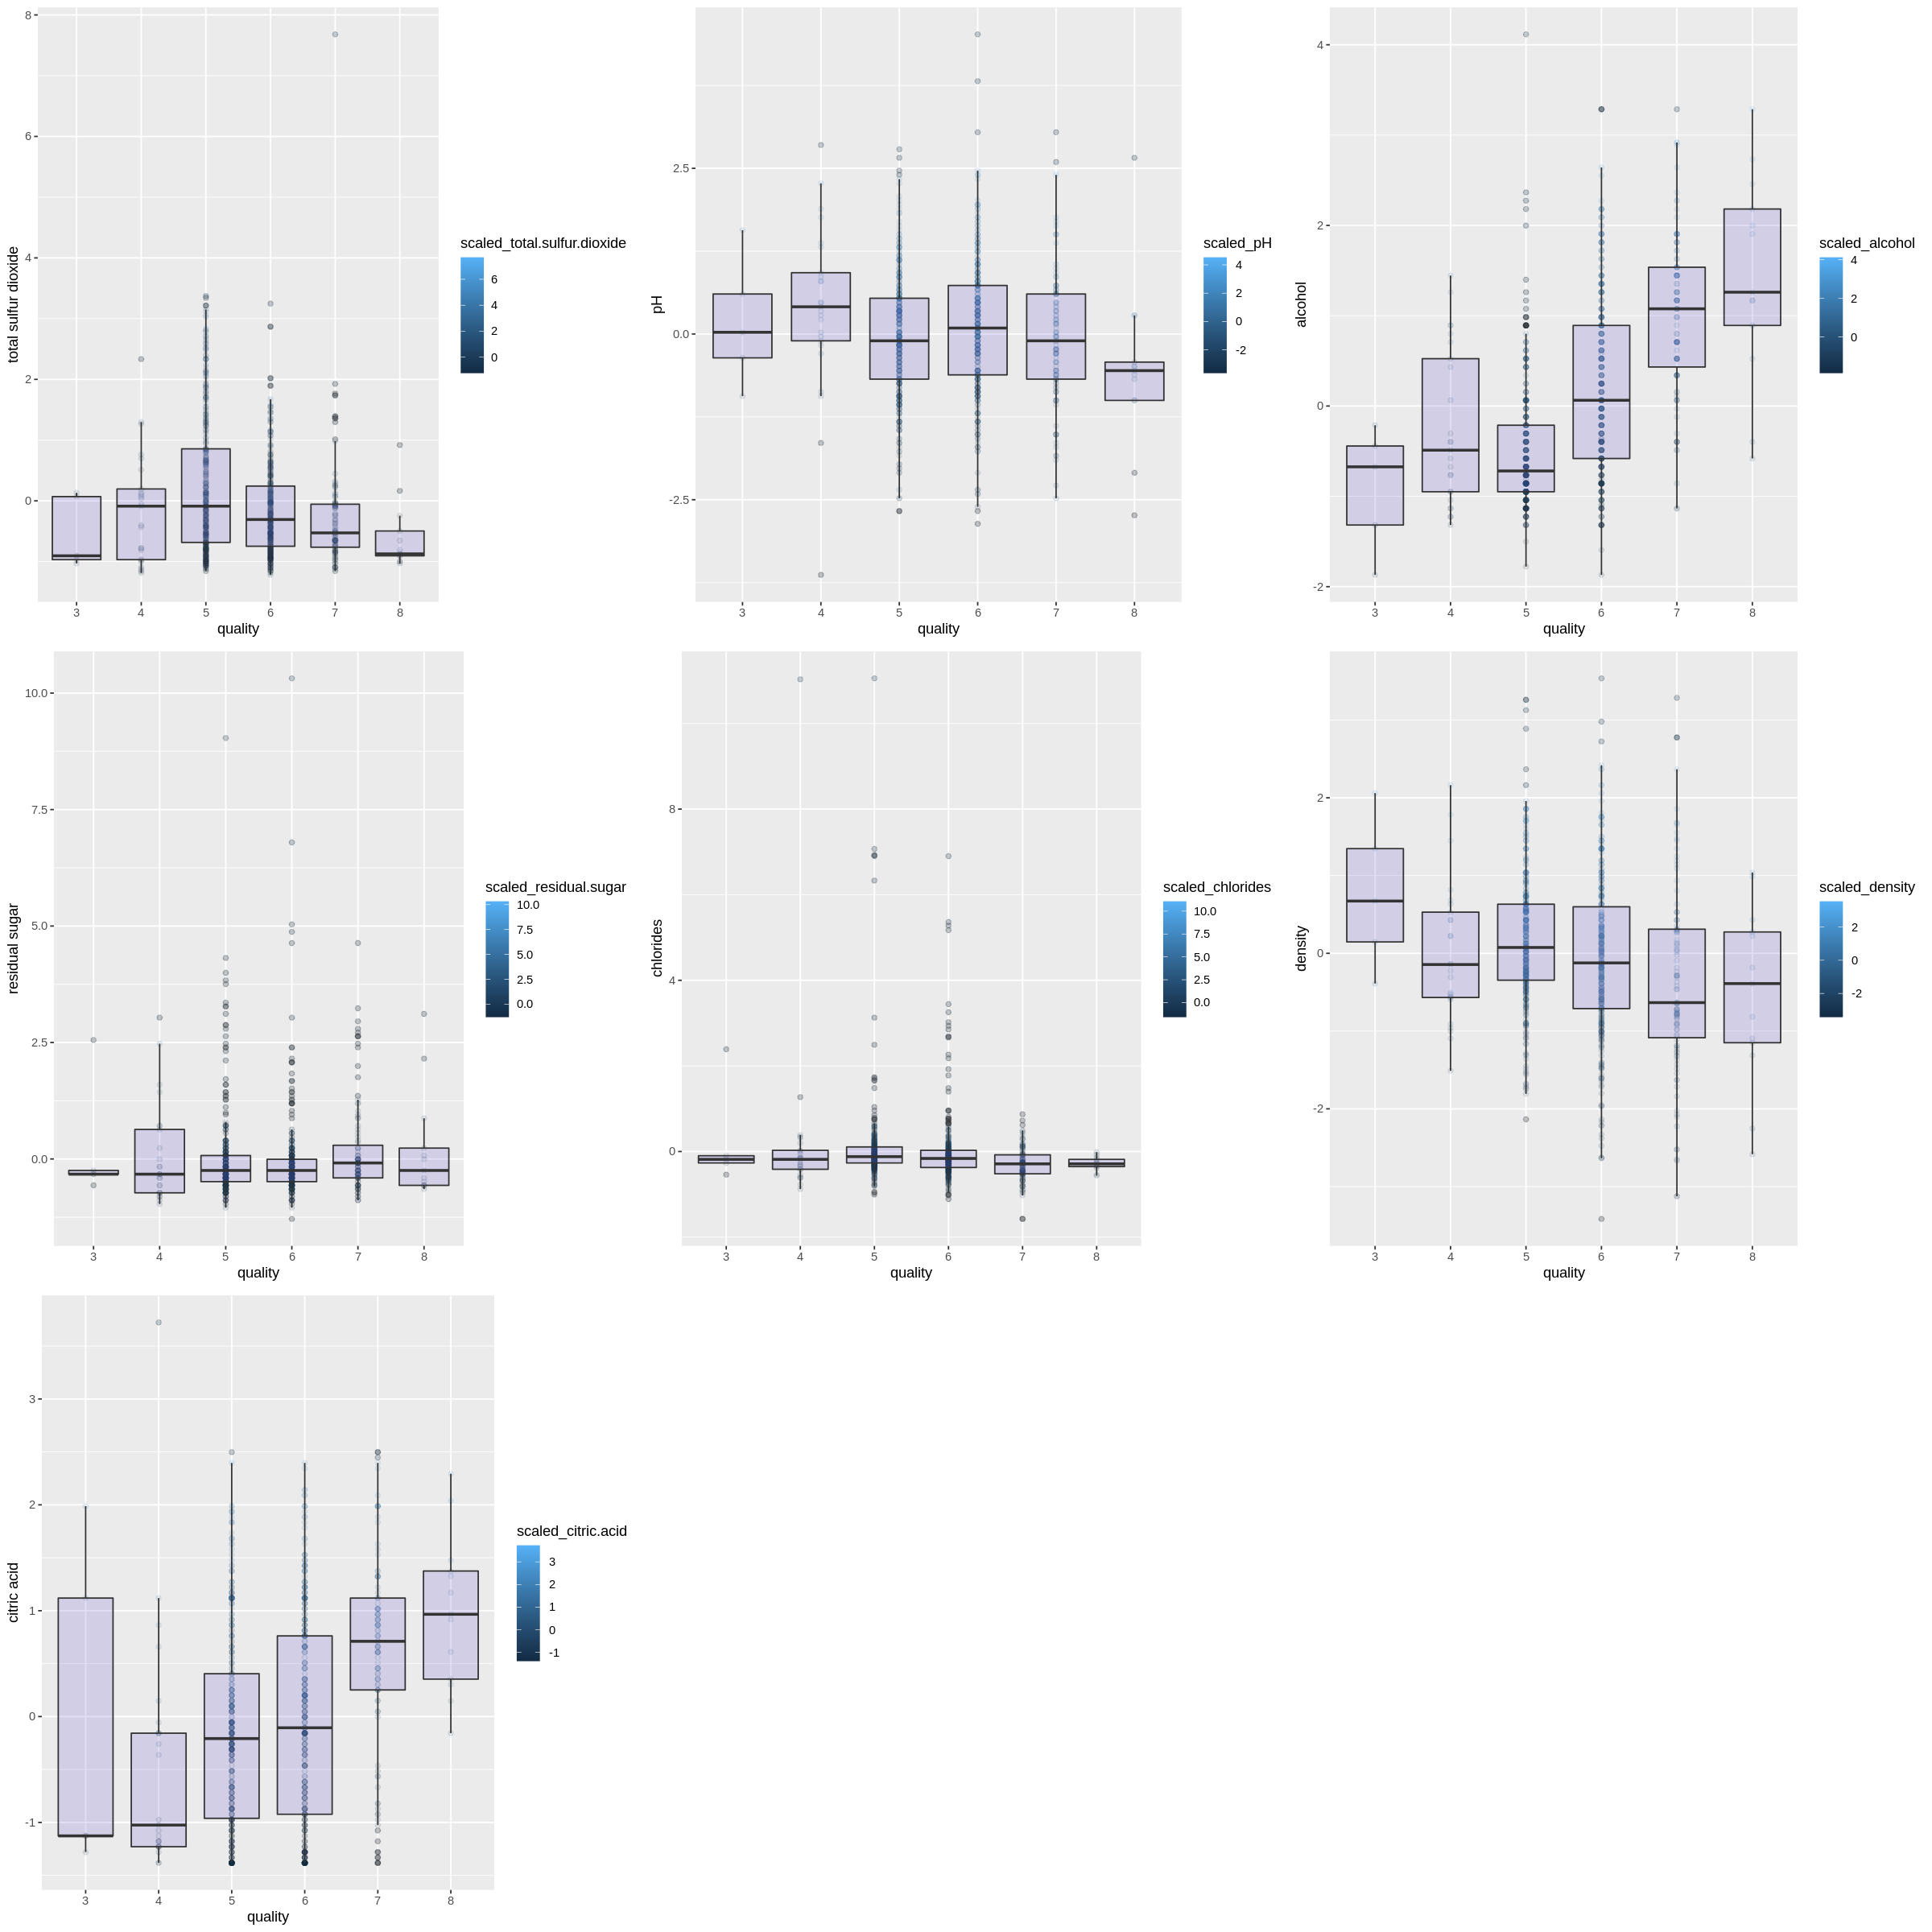

In [9]:
options(repr.plot.width = 20, repr.plot.height = 20)

scaled_relation_tsd <- wine_train_scaled %>%
   ggplot(aes(x = scaled_total.sulfur.dioxide, y = as.factor(quality))) +
   geom_point(aes(colour = scaled_total.sulfur.dioxide), alpha = 0.1) +
   geom_boxplot(fill="slateblue", alpha= 0.2) +
   coord_flip() +
   xlab("total sulfur dioxide") +
   ylab("quality")

scaled_relation_ph <- wine_train_scaled %>%
   ggplot(aes(x = scaled_pH, y = as.factor(quality))) +
   geom_point(aes(colour = scaled_pH), alpha = 0.1) +
   geom_boxplot(fill="slateblue", alpha= 0.2) +
   coord_flip() +
   xlab("pH") +
   ylab("quality")

scaled_relation_ah <- wine_train_scaled %>%
   ggplot(aes(x = scaled_alcohol, y = as.factor(quality))) +
   geom_point(aes(colour = scaled_alcohol), alpha = 0.1) +
   geom_boxplot(fill="slateblue", alpha= 0.2) +
   coord_flip() +
   xlab("alcohol") +
   ylab("quality")

scaled_relation_rs <- wine_train_scaled %>%
   ggplot(aes(x = scaled_residual.sugar, y = as.factor(quality))) +
   geom_point(aes(color = scaled_residual.sugar), alpha = 0.1) +
   geom_boxplot(fill="slateblue", alpha= 0.2) +
   coord_flip() +
   xlab("residual sugar") +
   ylab("quality")

scaled_relation_ch <- wine_train_scaled %>%
   ggplot(aes(x = scaled_chlorides, y = as.factor(quality))) +
   geom_point(aes(color = scaled_chlorides), alpha = 0.1) +
   geom_boxplot(fill="slateblue", alpha= 0.2) +
   coord_flip() +
   xlab("chlorides") +
   ylab("quality")

scaled_relation_ds <- wine_train_scaled %>%
   ggplot(aes(x = scaled_density, y = as.factor(quality))) +
   geom_point(aes(color = scaled_density), alpha = 0.1) +
   geom_boxplot(fill="slateblue", alpha= 0.2) +
   coord_flip() +
   xlab("density") +
   ylab("quality")

scaled_relation_ca <- wine_train_scaled %>%
   ggplot(aes(x = scaled_citric.acid, y = as.factor(quality))) +
   geom_point(aes(color = scaled_citric.acid), alpha = 0.1) +
   geom_boxplot(fill="slateblue", alpha= 0.2) +
   coord_flip() +
   xlab("citric acid") +
   ylab("quality")

plot_grid(scaled_relation_tsd, scaled_relation_ph, scaled_relation_ah, scaled_relation_rs, scaled_relation_ch, scaled_relation_ds, scaled_relation_ca)

The following data is centered and scaled, all the data is balanced.